# Notebook for Analysis and Model Development

* **Team :** Data Crew

This is the corresponding jupyter notebook where the model will be developed and stored in order to make predictions on the data.

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Own Libraries
from utils import *

# Dictionary
from collections import defaultdict

sns.set_style('whitegrid')

## Data Concerns

### Reading data

In [2]:
data = pd.read_csv('../../1. Data/smaller_sample.csv')
event_defs = pd.read_csv('../../1. Data/Event+Definitions.csv')

data

,customer_id,account_id,stage,ed_id,event_name,event_timestamp,journey_steps_until_end,journey_id,milestone_number
0,2.787130e+08,-1812321640,Discover,2,campaign_click,2021-05-31 06:00:00,1,1.0,NaN
1,2.787130e+08,-1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:11:03,2,1.0,NaN
2,2.787130e+08,-1812321640,Apply for Credit,3,application_web_submit,2021-05-31 23:11:51,3,1.0,NaN
3,2.787130e+08,-1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:11:51,4,1.0,NaN
4,2.787130e+08,-1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:11:51,5,1.0,NaN
...,...,...,...,...,...,...,...,...,...
3246336,-1.948257e+09,-1123823706,First Purchase,5,view_cart,2023-08-29 02:45:54,28,1.0,NaN
3246337,-1.948257e+09,-1123823706,First Purchase,4,browse_products,2023-08-29 02:45:54,29,1.0,NaN
3246338,-1.948257e+09,-1123823706,First Purchase,11,add_to_cart,2023-08-29 02:45:54,30,1.0,NaN
3246339,-1.948257e+09,-1123823706,First Purchase,6,begin_checkout,2023-08-29 02:45:54,31,1.0,NaN


### Cleaning data

* Correcting the journey steps

* Applying the cleaning functions

In [3]:
df = fingerhut_data_cleaner(data, event_defs)
df

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end,milestone_number,stage
0,278713037,1812321640,2,campaign_click,2021-05-31 06:00:00,1,NaN,Discover
1,278713037,1812321640,19,application_web_view,2021-05-31 23:11:03,2,NaN,Apply for Credit
2,278713037,1812321640,3,application_web_submit,2021-05-31 23:11:51,3,NaN,Apply for Credit
3,278713037,1812321640,19,application_web_view,2021-05-31 23:11:51,4,NaN,Apply for Credit
4,278713037,1812321640,19,application_web_view,2021-05-31 23:11:54,5,NaN,Apply for Credit
...,...,...,...,...,...,...,...,...
2849137,1948257044,1123823706,11,add_to_cart,2023-08-28 18:50:58,8,NaN,First Purchase
2849138,1948257044,1123823706,5,view_cart,2023-08-29 02:45:54,9,NaN,First Purchase
2849139,1948257044,1123823706,4,browse_products,2023-08-29 02:45:54,10,NaN,First Purchase
2849140,1948257044,1123823706,11,add_to_cart,2023-08-29 02:45:54,11,NaN,First Purchase


* Verifying if the data is clean and the sequences are corrected.

In [147]:
has_correct_sequence(df['journey_steps_until_end'])

True

* Deleting promotion created event

In [148]:
idxs = list(df[df['event_name'] == 'promotion_created'].index)

# DROP THE INDEX OF THIS QUERY IN THE DATASET
df.drop(idxs, inplace=True)
df.reset_index(drop=True, inplace=True)

## Sequences (Obtaining sequences)

### Obtaining the sequences with the correct states

* Function for the sequences and the states

In [149]:
result_sequences = split_sequences(df)

* Assigning the probabilities for each state

In [150]:
result_sequences[0:3]

[[2, 19, 3, 19, 19, 3, 19, 19, 19, 3, 19, 12],
 [15],
 [19,
  19,
  19,
  19,
  19,
  19,
  3,
  19,
  19,
  19,
  3,
  12,
  4,
  11,
  4,
  4,
  4,
  11,
  4,
  4,
  5,
  4,
  4,
  11,
  5,
  5,
  5,
  6,
  4,
  4,
  5,
  4,
  4,
  11,
  5,
  4,
  11,
  5,
  4,
  5,
  6,
  7,
  8,
  29,
  4,
  4,
  4,
  11,
  4,
  4,
  11,
  5,
  27,
  5,
  4,
  5,
  4,
  5,
  5,
  6,
  6,
  28]]

### Distribution of the length of the sequences

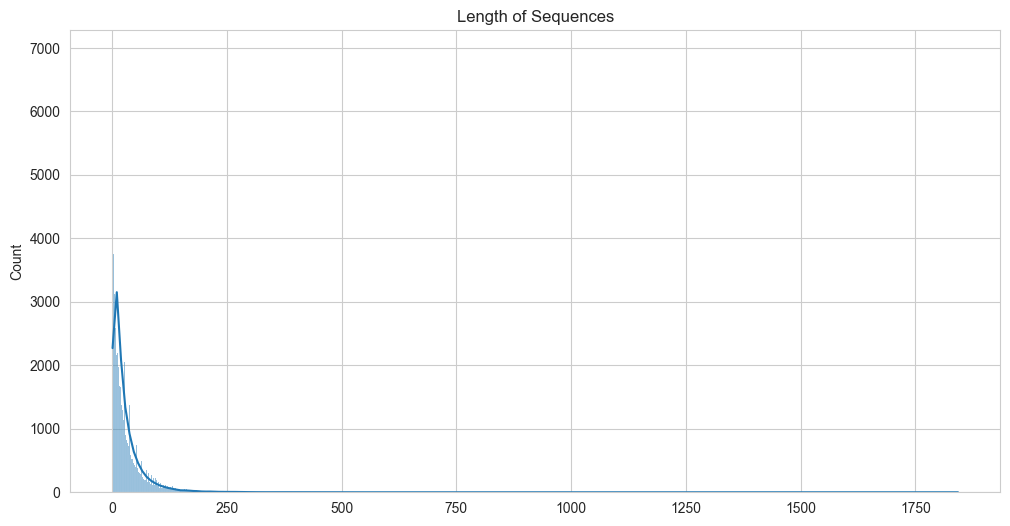

In [151]:
lengths = []
for seq in result_sequences:
    lengths.append(len(seq))
    
plt.figure(figsize=(12, 6))
sns.histplot(lengths, kde=True)
plt.title('Length of Sequences')
plt.show()

## Creating New Data Set for Binary Classification

* By making it suitable for clustering/analysis/classification of the customers without the explicit sequences

My proposal is to create a new dataset with the customer_ids where each instance corresponds to an only customer where the features are descriptive features about the sequences and the stages.

Ideas of more features to be added:   
* Avg length of the sequence (avg in case has more than one, otherwise the length of the unique sequence) ✅
* Has more than one journey ✅
* Number of journeys ✅
* Has order shipped ✅

* Has a complete journey

* Number of complete stages

* Time between the application and first purchase, then time from the first purchase to down payment and then down payment to order shipped

* max number of journey_steps_until_end

* Most repeated event in the journey

* has a down payment

* has a order shipped

* Returning customer

* number of attempts (applying for a credit)

* Highest milestone reached

In [187]:
df

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end,stage
0,278713037,1812321640,2,campaign_click,2021-05-31 06:00:00,1,Discover
1,278713037,1812321640,19,application_web_view,2021-05-31 23:11:03,2,Apply for Credit
2,278713037,1812321640,3,application_web_submit,2021-05-31 23:11:51,3,Apply for Credit
3,278713037,1812321640,19,application_web_view,2021-05-31 23:11:51,4,Apply for Credit
4,278713037,1812321640,19,application_web_view,2021-05-31 23:11:54,5,Apply for Credit
...,...,...,...,...,...,...,...
2506807,1948257044,1123823706,11,add_to_cart,2023-08-28 18:50:58,8,First Purchase
2506808,1948257044,1123823706,5,view_cart,2023-08-29 02:45:54,9,First Purchase
2506809,1948257044,1123823706,4,browse_products,2023-08-29 02:45:54,10,First Purchase
2506810,1948257044,1123823706,11,add_to_cart,2023-08-29 02:45:54,11,First Purchase


In [156]:
event_defs['stage'].unique()

array(['Apply for Credit', 'Credit Account', 'Discover', 'Downpayment',
       'First Purchase', 'Order Shipped', 'Prospecting'], dtype=object)

In [173]:
# Function for repeated values in a list returns a boolean
def has_more_one_journey(cus_df):
    """Function to check if a sequence has repeated values

    Args:
        seq (list): List of values

    Returns:
        bool: True if there are repeated values, False otherwise
    """
    j_steps = cus_df['journey_steps_until_end']
    return len(j_steps) != len(set(j_steps))


# Function that verifies if the customer has more than one journey i.e. more than one sequence (two ones in the sequence)
def number_journeys(cus_df):
    """Function to check the number of journeys in a sequence

    Args:
        seq (list): List of values

    Returns:
        int: Number of journeys in the sequence
    """
    j_steps = cus_df['journey_steps_until_end']
    ones = [i for i, x in enumerate(j_steps) if x == 1]
    return len(ones)

# Function that verify if the customer has an order shipped
def has_order_shipped(cus_df):
    """Function to check if a sequence has the correct format

    Args:
        seq (list): List of values

    Returns:
        bool: True if the sequence has the correct format, False otherwise
    """
    # 28 is the id of the event order_shipped
    return 28 in set(cus_df['ed_id'])

def average_length_seq(cust_df):
    """Function to add the average length of the sequences to the dataset

    Args:
        cust_df (pd.DataFrame): Dataset of a certain customer (not all the dataset, just one customer)

    Returns:
        pd.DataFrame: Dataset with the average length of the sequences in a new column
    """
    new_df = cust_df.copy()
    # Split the sequences
    sequences = split_sequences(new_df)
    return np.mean([len(seq) for seq in sequences])

def number_accounts(cust_df):
    """Function to add the number of accounts to the dataset

    Args:
        cust_df (pd.DataFrame): Dataset of a certain customer (not all the dataset, just one customer)

    Returns:
        pd.DataFrame: Dataset with the number of accounts in a new column
    """
    return len(set(cust_df['account_id']))

def has_discover(cust_df):
    """Function to check if a sequence has the discovery event

    Args:
        cust_df (pd.DataFrame): Dataset of a certain customer (not all the dataset, just one customer)

    Returns:
        bool: True if the sequence has the discovery event, False otherwise
    """
    return 'Discover' in list(cust_df['stage'])

In [154]:
num_unique_cust = len(df['customer_id'].unique())
print(f'Number of unique customers: {num_unique_cust}')

Number of unique customers: 83282


In [185]:
df[df['customer_id'] == 1694568649]

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end,stage
75,1694568649,1317165574,19,application_web_view,2022-08-11 09:04:00,1,Apply for Credit
76,1694568649,1317165574,19,application_web_view,2022-08-11 09:04:04,2,Apply for Credit
77,1694568649,1317165574,19,application_web_view,2022-08-11 09:04:23,3,Apply for Credit
78,1694568649,1317165574,19,application_web_view,2022-08-11 09:04:26,4,Apply for Credit
79,1694568649,1317165574,3,application_web_submit,2022-08-11 09:04:35,5,Apply for Credit
...,...,...,...,...,...,...,...
649327,1694568649,1311772857,5,view_cart,2021-05-02 20:05:01,18,First Purchase
649328,1694568649,1311772857,5,view_cart,2021-05-02 20:11:02,19,First Purchase
649329,1694568649,1311772857,4,browse_products,2021-05-02 20:11:22,20,First Purchase
649330,1694568649,1311772857,5,view_cart,2021-05-02 20:11:41,21,First Purchase


In [176]:
for cus_id in df['customer_id'].unique():    
    # Obtain the dataset of a certain customer
    cus_df = df[df['customer_id'] == cus_id]
    
    if not has_more_one_journey(cus_df):
        continue
    
    print(f'Customer {cus_id}')
    print(f'Does the customer {cus_id} has more than one journey? R - {has_more_one_journey(cus_df)}')
    print('Number of journeys this customer has : ', number_journeys(cus_df))
    print('Has order shipped : ', has_order_shipped(cus_df))
    print('Average length of the sequences : ', average_length_seq(cus_df))
    print('Number of accounts : ', number_accounts(cus_df))
    print('Has Discover : ', has_discover(cus_df))
    print('Has first purchase : ', )
    
    break

Customer 1694568649
Does the customer 1694568649 has more than one journey? R - True
Number of journeys this customer has :  2
Has order shipped :  False
Average length of the sequences :  43.0
Number of accounts :  2
Has Discover :  False
Has first purchase : 


In [43]:
#df = add_n_accounts(df)
df = add_has_discover(df)
df = add_has_first_purchase(df)
df

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end,stage,n_accounts,has_discover,has_first_purchase
0,278713037,1812321640,2,campaign_click,2021-05-31 06:00:00,1,Discover,1,True,False
1,278713037,1812321640,19,application_web_view,2021-05-31 23:11:03,2,Apply for Credit,1,True,False
2,278713037,1812321640,3,application_web_submit,2021-05-31 23:11:51,3,Apply for Credit,1,True,False
3,278713037,1812321640,19,application_web_view,2021-05-31 23:11:51,4,Apply for Credit,1,True,False
4,278713037,1812321640,19,application_web_view,2021-05-31 23:11:54,5,Apply for Credit,1,True,False
...,...,...,...,...,...,...,...,...,...,...
2506807,1948257044,1123823706,11,add_to_cart,2023-08-28 18:50:58,8,First Purchase,1,False,True
2506808,1948257044,1123823706,5,view_cart,2023-08-29 02:45:54,9,First Purchase,1,False,True
2506809,1948257044,1123823706,4,browse_products,2023-08-29 02:45:54,10,First Purchase,1,False,True
2506810,1948257044,1123823706,11,add_to_cart,2023-08-29 02:45:54,11,First Purchase,1,False,True


In [ ]:
# Grouping by customer and creating another dataframe with the sequences
df_example = df.groupby(['customer_id', 'account_id'])
for name, group in df_example:
    new_df = group
    break

new_df = pd.DataFrame(new_df)
new_df

,customer_id,account_id,ed_id,event_name,event_timestamp,journey_steps_until_end,stage,n_accounts,has_discover,has_first_purchase
2104852,5414,1995603037,21,catalog_(mail),2022-09-19 00:00:00,1,NaN,1,True,True
2104853,5414,1995603037,12,application_web_approved,2022-10-09 15:19:51,2,Apply for Credit,1,True,True
2104854,5414,1995603037,4,browse_products,2022-10-09 15:29:00,3,First Purchase,1,True,True
2104855,5414,1995603037,2,campaign_click,2022-10-09 21:19:51,4,Discover,1,True,True
2104856,5414,1995603037,4,browse_products,2022-12-01 11:36:47,5,First Purchase,1,True,True
2104857,5414,1995603037,11,add_to_cart,2022-12-01 11:36:49,6,First Purchase,1,True,True
2104858,5414,1995603037,4,browse_products,2022-12-01 11:37:44,7,First Purchase,1,True,True
2104859,5414,1995603037,11,add_to_cart,2022-12-01 11:37:46,8,First Purchase,1,True,True
2104860,5414,1995603037,5,view_cart,2022-12-01 11:37:57,9,First Purchase,1,True,True
2104861,5414,1995603037,4,browse_products,2022-12-01 11:41:03,10,First Purchase,1,True,True


## Trying Darren Final Dataset

In [21]:
data = pd.read_csv('../../1. Data/smaller_sample.csv')
event_defs = pd.read_csv('../../1. Data/Event+Definitions.csv')
# data.customer_id = list(range(0, len(data)))
df = fingerhut_data_cleaner(data, event_defs)

idxs = list(df[df['event_name'] == 'promotion_created'].index)
df.drop(idxs, inplace=True)
df.reset_index(drop=True, inplace=True)

def add_downpayment_cleared(df):
    downpaymen_cleared = df.groupby('customer_id')['ed_id'].apply(lambda x: 27 in x.values).reset_index(name='downpayment_cleared')
    return pd.merge(df, downpaymen_cleared, on='customer_id')

df = add_n_accounts(df)
df = add_has_discover(df)
df = add_downpayment_cleared(df)

# Filter customers with at least 10 events and downpayment not cleared in the first 10 events.
# Want to see if models can predict whether or not a customer clears downpayment by only looking
# at first 10 actions.

df = df.sort_values(
        ['customer_id', 'journey_steps_until_end']
    ).groupby(['customer_id'], sort=False).agg(
        {
            'ed_id': lambda x: list(x)[:10],
            'journey_steps_until_end': lambda x: list(x)[-1],
            'has_discover': 'first',
            'downpayment_cleared': 'first',
            'n_accounts': 'first',
        }
)

df = df[df.ed_id.apply(lambda x: len(x) == 10)]

df = df.reset_index()

idx = df[df.ed_id.apply(lambda x: 27 in x)].index
df.drop(idx, inplace=True)

df_X = df.drop(columns=['downpayment_cleared', 'customer_id'])
target = df.downpayment_cleared.astype(int)

In [22]:
df_X

,ed_id,journey_steps_until_end,has_discover,n_accounts
0,"[21, 12, 4, 2, 4, 11, 4, 11, 5, 4]",27,True,1
1,"[29, 2, 12, 4, 4, 4, 11, 4, 4, 11]",30,True,1
2,"[2, 19, 19, 19, 19, 3, 19, 12, 19, 4]",22,True,1
3,"[19, 19, 19, 19, 19, 19, 19, 19, 19, 3]",114,False,1
4,"[19, 19, 19, 19, 3, 19, 19, 19, 19, 19]",23,False,1
...,...,...,...,...
57065,"[2, 12, 4, 11, 4, 4, 5, 5, 4, 4]",15,True,1
57066,"[2, 12, 24, 4, 24, 4, 11, 24, 4, 4]",35,True,1
57067,"[12, 4, 4, 4, 4, 4, 4, 4, 4, 2]",12,True,1
57068,"[12, 6, 11, 5, 4, 19, 3, 6, 11, 5]",15,False,1


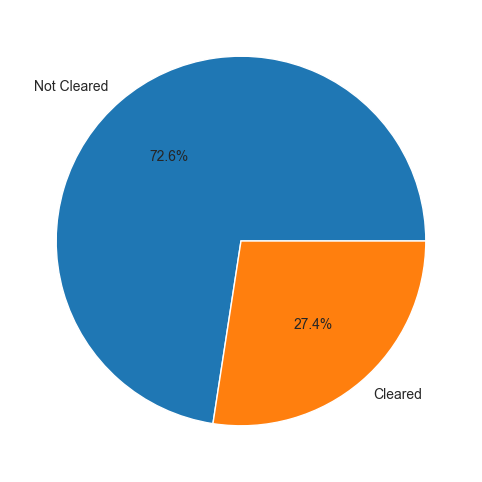

In [25]:
# Proportion of the target
plt.figure(figsize=(12, 6))
plt.pie(target.value_counts(), labels=['Not Cleared', 'Cleared'], autopct='%1.1f%%')
plt.show()

## Models proposed for probabilities/prediction of the events

* Markov Chain (probs) - Dan & Axel
* Hidden Markov Model (probs) - Dan & Axel
* LSTM for prediction on the next state - TARO

### Markov Chain for probabilities

#### Transition Matrix

* Defining the transition matrix

In [ ]:
# This is going to be our transition matrix
# It will be a dictionary of dictionaries
probs = {}

# Estimation of the transition probabilities
for seq in result_sequences:
    for i in range(len(seq) - 1):
        current_state = seq[i]
        next_state = seq[i + 1]
        
        if current_state == 1:
            print('warning at', i)

        if current_state not in probs:
            # Default dict to add withour checking if the key exists
            probs[current_state] = defaultdict(float)

        probs[current_state][next_state] += 1

probs

{2: defaultdict(float,
             {19: 7741.0,
              12: 20960.0,
              4: 6708.0,
              5: 1647.0,
              3: 459.0,
              27: 265.0,
              22: 3808.0,
              23: 20.0,
              6: 796.0,
              21: 1138.0,
              24: 1565.0,
              29: 468.0,
              13: 425.0,
              2: 244.0,
              8: 39.0,
              11: 328.0,
              18: 61.0,
              15: 16.0,
              26: 11.0,
              28: 6.0,
              10: 1.0,
              7: 12.0}),
 19: defaultdict(float,
             {3: 52971.0,
              19: 210885.0,
              12: 15636.0,
              4: 13907.0,
              5: 3120.0,
              11: 653.0,
              6: 1202.0,
              2: 2372.0,
              24: 1444.0,
              7: 52.0,
              21: 1921.0,
              29: 339.0,
              13: 459.0,
              15: 37.0,
              22: 110.0,
              28: 63.0,
     

* Now we normalize these counts to obtain the probabilities (i.e. values between 0 and 1 that sum to 1)

In [ ]:
for state in probs:
    # Obtain the total of transitions for this certain state
    total_transitions = sum(probs[state].values())
    
    # Now for each next state that has a connection with the current state, we obtain
    # the number of transitions and divide it by the total transitions to obtain the probability
    for next_state in probs[state]:
        probs[state][next_state] /= total_transitions

In [ ]:
try:
    probs[1]
except KeyError:
    print('No state 1 - this should be the case otherwise we have a problem with the event promotion_created')

No state 1 - this should be the case otherwise we have a problem with the event promotion_created


* Verify if the probabilities are correct

In [ ]:
for state in probs:
    summ = sum(probs[state].values())
    if summ != 1:
        print(f'State {state} sum', summ)

State 4 sum 0.9999999999999999
State 6 sum 0.9999999999999999
State 29 sum 0.9999999999999998
State 27 sum 0.9999999999999999
State 21 sum 0.9999999999999999
State 15 sum 1.0000000000000002
State 18 sum 0.9999999999999999
State 20 sum 0.9999999999999999
State 10 sum 0.9999999999999999


#### Predicting the next state

* Simple and basic prediction of the next state

In [ ]:
def predict_next_state(current_state):
    """Function to predict the next state given the current state

    Args:
        current_state (int): Current state of the user

    Returns:
        int: Next state of the user
    """
    if current_state in probs:
        next_states = list(probs[current_state].keys())
        probabilities = list(probs[current_state].values())
        
        # Randomly select the next state given the probabilities
        predicted_state = np.random.choice(next_states, p=probabilities)
        
        return predicted_state
    else:
        print('State not found in the existing events.')
        return None

* Example for predicting the next state

In [ ]:
# There should not be any state 1
probs.keys()

dict_keys([2, 19, 3, 12, 4, 11, 5, 6, 7, 8, 29, 27, 24, 21, 22, 15, 23, 26, 28, 13, 18, 20, 16, 10, 14])

In [ ]:
current_state = 2
predicted_state = predict_next_state(current_state)

current_event_name = event_defs[event_defs['event_definition_id'] == current_state]['event_name'].values[0]
predicted_event_name = event_defs[event_defs['event_definition_id'] == predicted_state]['event_name'].values[0]

print(f"Given the event {current_event_name}, the next event the user will go is {predicted_event_name}")

Given the event campaign_click, the next event the user will go is application_web_approved


Note : Verify if tthe prediction arises a problem

## Analysis

The following analysis is pending to be done.

Good ideas for further analysis:

* Go further in the analysis in the people that had applied for a credit and did not get it

## Model (Clustering or Association Rules)

(Clustering for the customers or finding patterns in the data with some association rulel algorithms)

Second approach for the model. Predict if a customer will 